# Data Profiling - Sparsity
" _Encompasses the exploration of the domain coverage, in a multi-variate way. This is done through the cross analysis of the records projected according to just a few of its variables (usually only two)_ "

## Heart Failure Dataset
_Heart failure is a common event caused by CVDs and this dataset contains 12 features that can be used to predict mortality by heart failure._

### Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import config as cfg

import seaborn as sns

register_matplotlib_converters()

### Load Data

In [2]:
data = pd.read_csv('../datasets/heart_failure_clinical_records_dataset.csv')

In [3]:
data.head()

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  DEATH_EVENT  
0        0     4            1  
1        0     6            1  
2        1     7            1  
3        0     7            1  
4        0     8            1

### Sparsity
" _A dataset is said to be sparse when most of the space defined by its variables is not covered by the records in the dataset_ "

<Figure size 600x450 with 0 Axes>

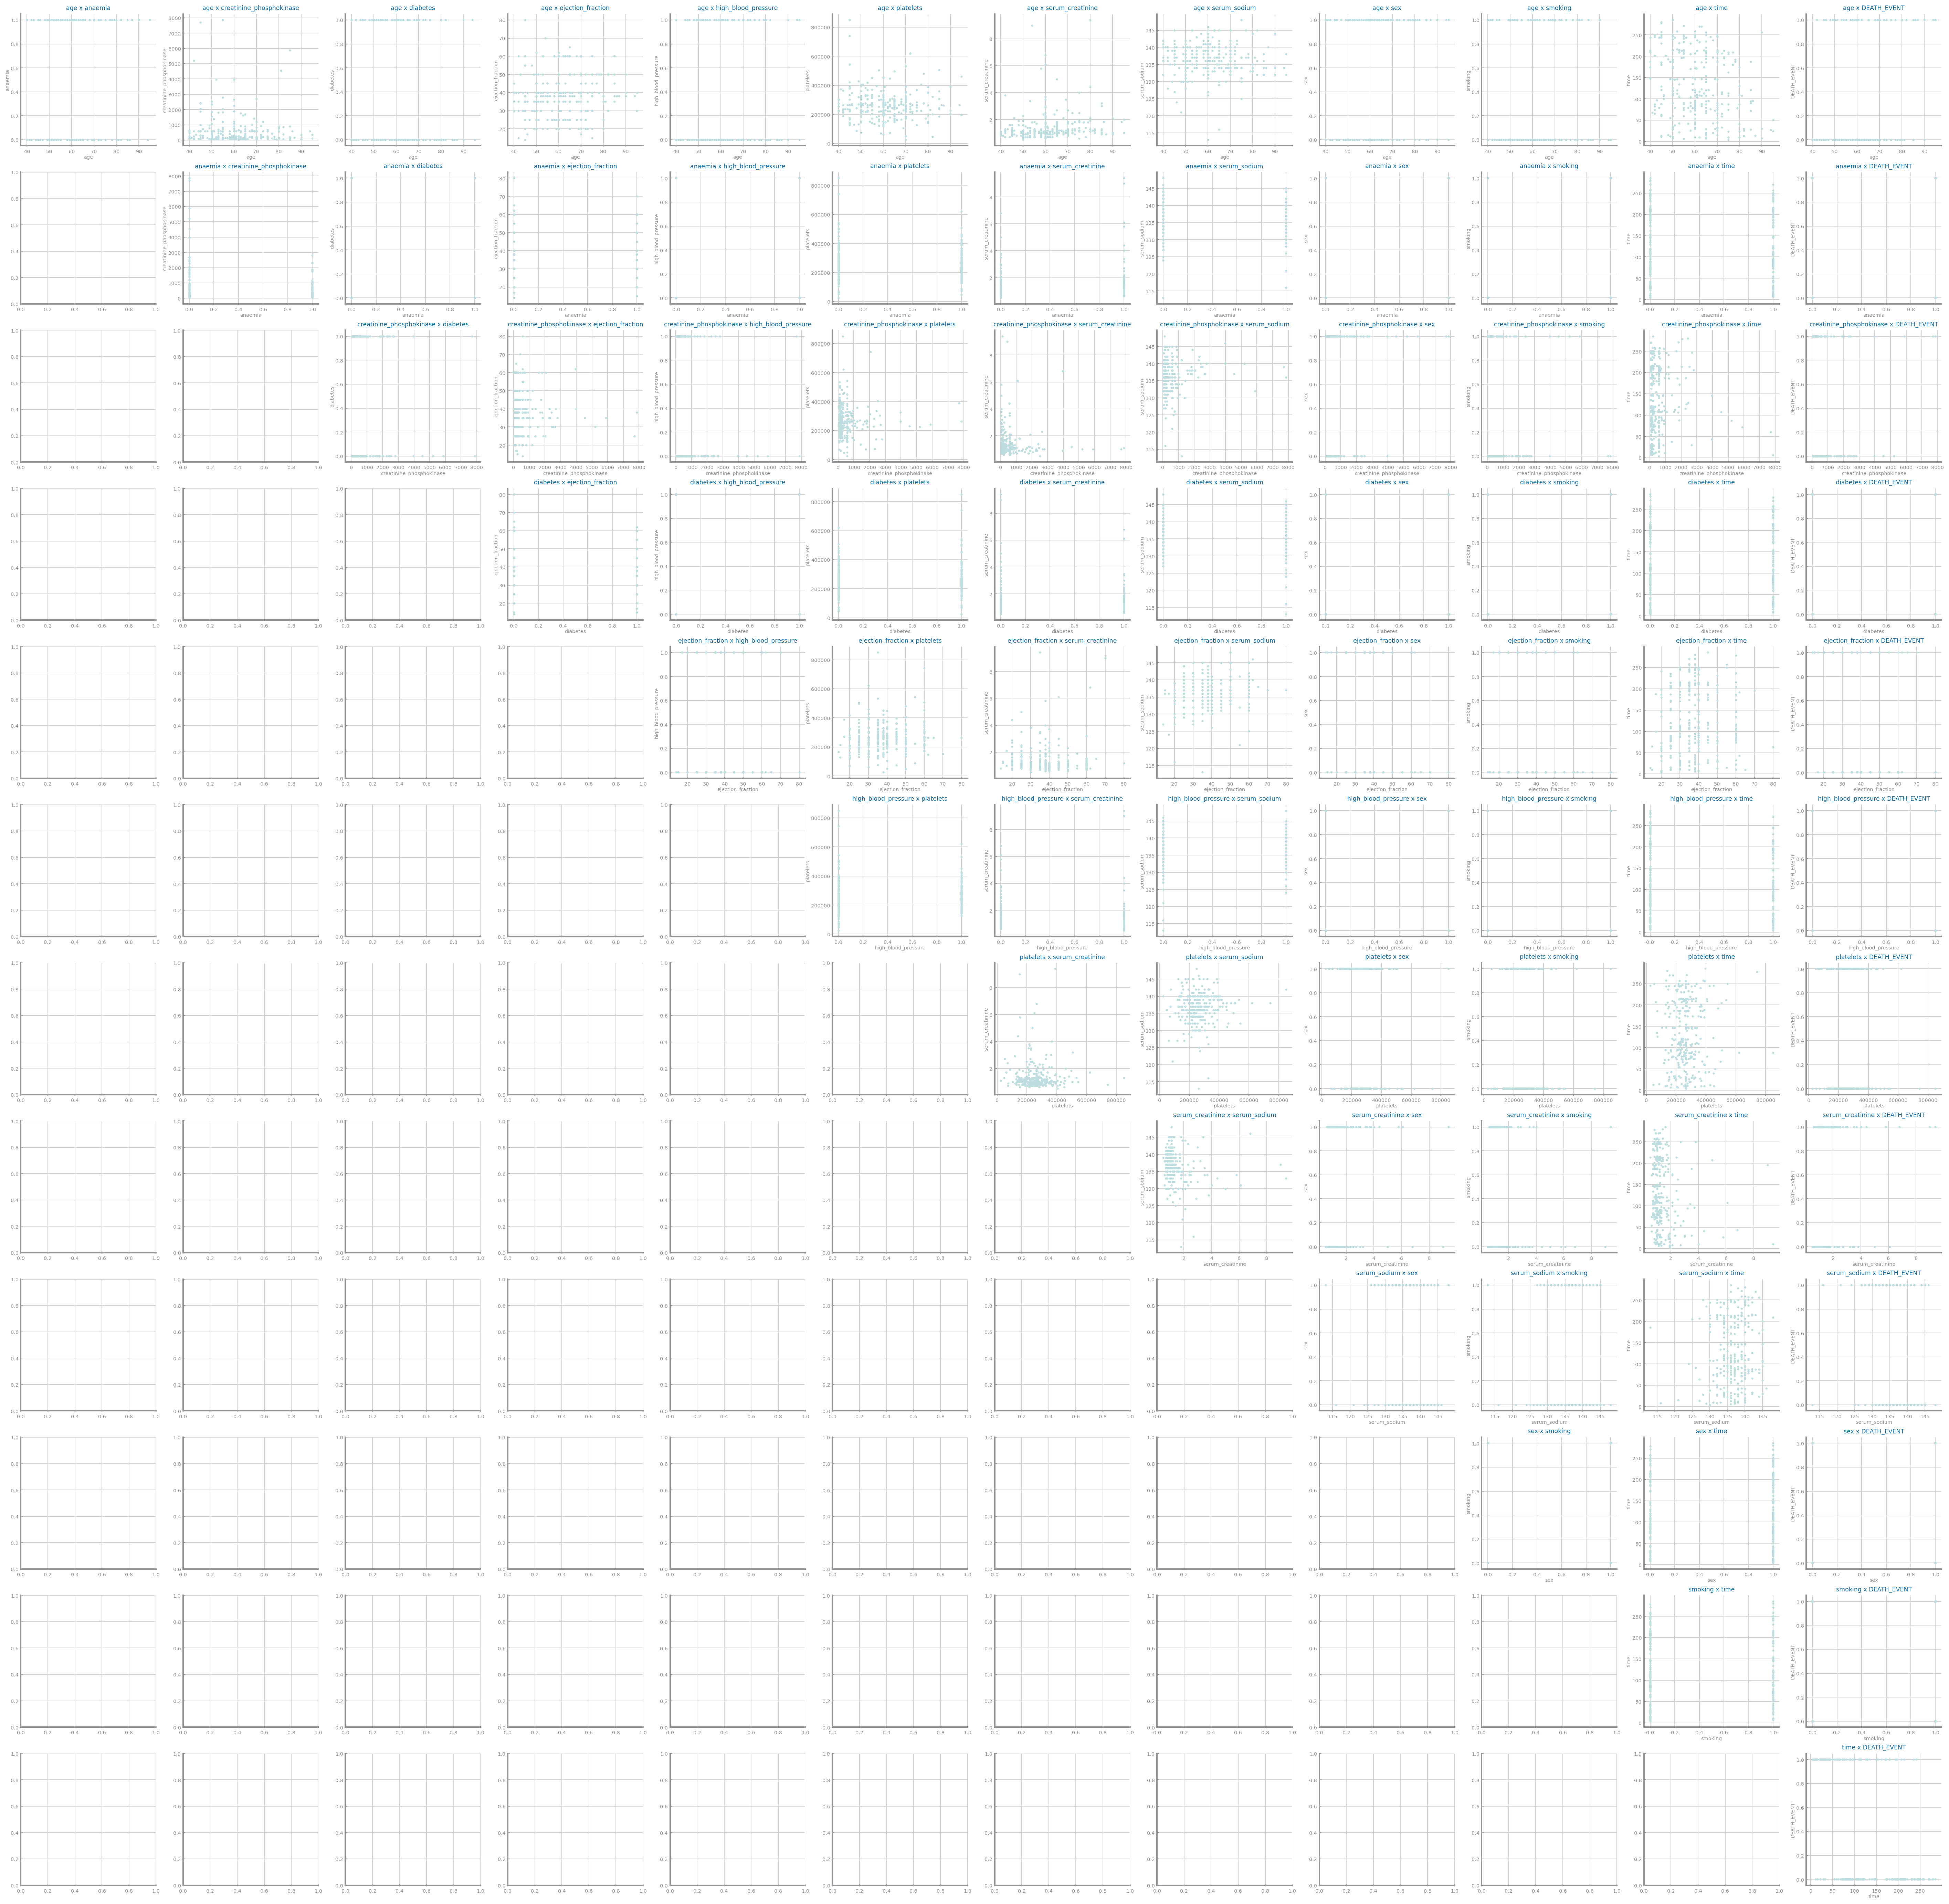

In [4]:
columns = data.select_dtypes(include='number').columns
rows, cols = len(columns)-1, len(columns)-1
plt.figure()
fig, axs = plt.subplots(rows, cols, figsize=(cols*4, rows*4), squeeze=False)
for i in range(len(columns)):
    var1 = columns[i]
            
    for j in range(i+1, len(columns)): 
        var2 = columns[j]
        axs[i, j-1].set_title("%s x %s"%(var1,var2))
        axs[i, j-1].set_xlabel(var1)
        axs[i, j-1].set_ylabel(var2)
        axs[i, j-1].scatter(data[var1], data[var2])
plt.show()

In [5]:
# select the subset of columns that aren't boolean
data_no_bool = data[['age', 'creatinine_phosphokinase', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']]

<Figure size 600x450 with 0 Axes>

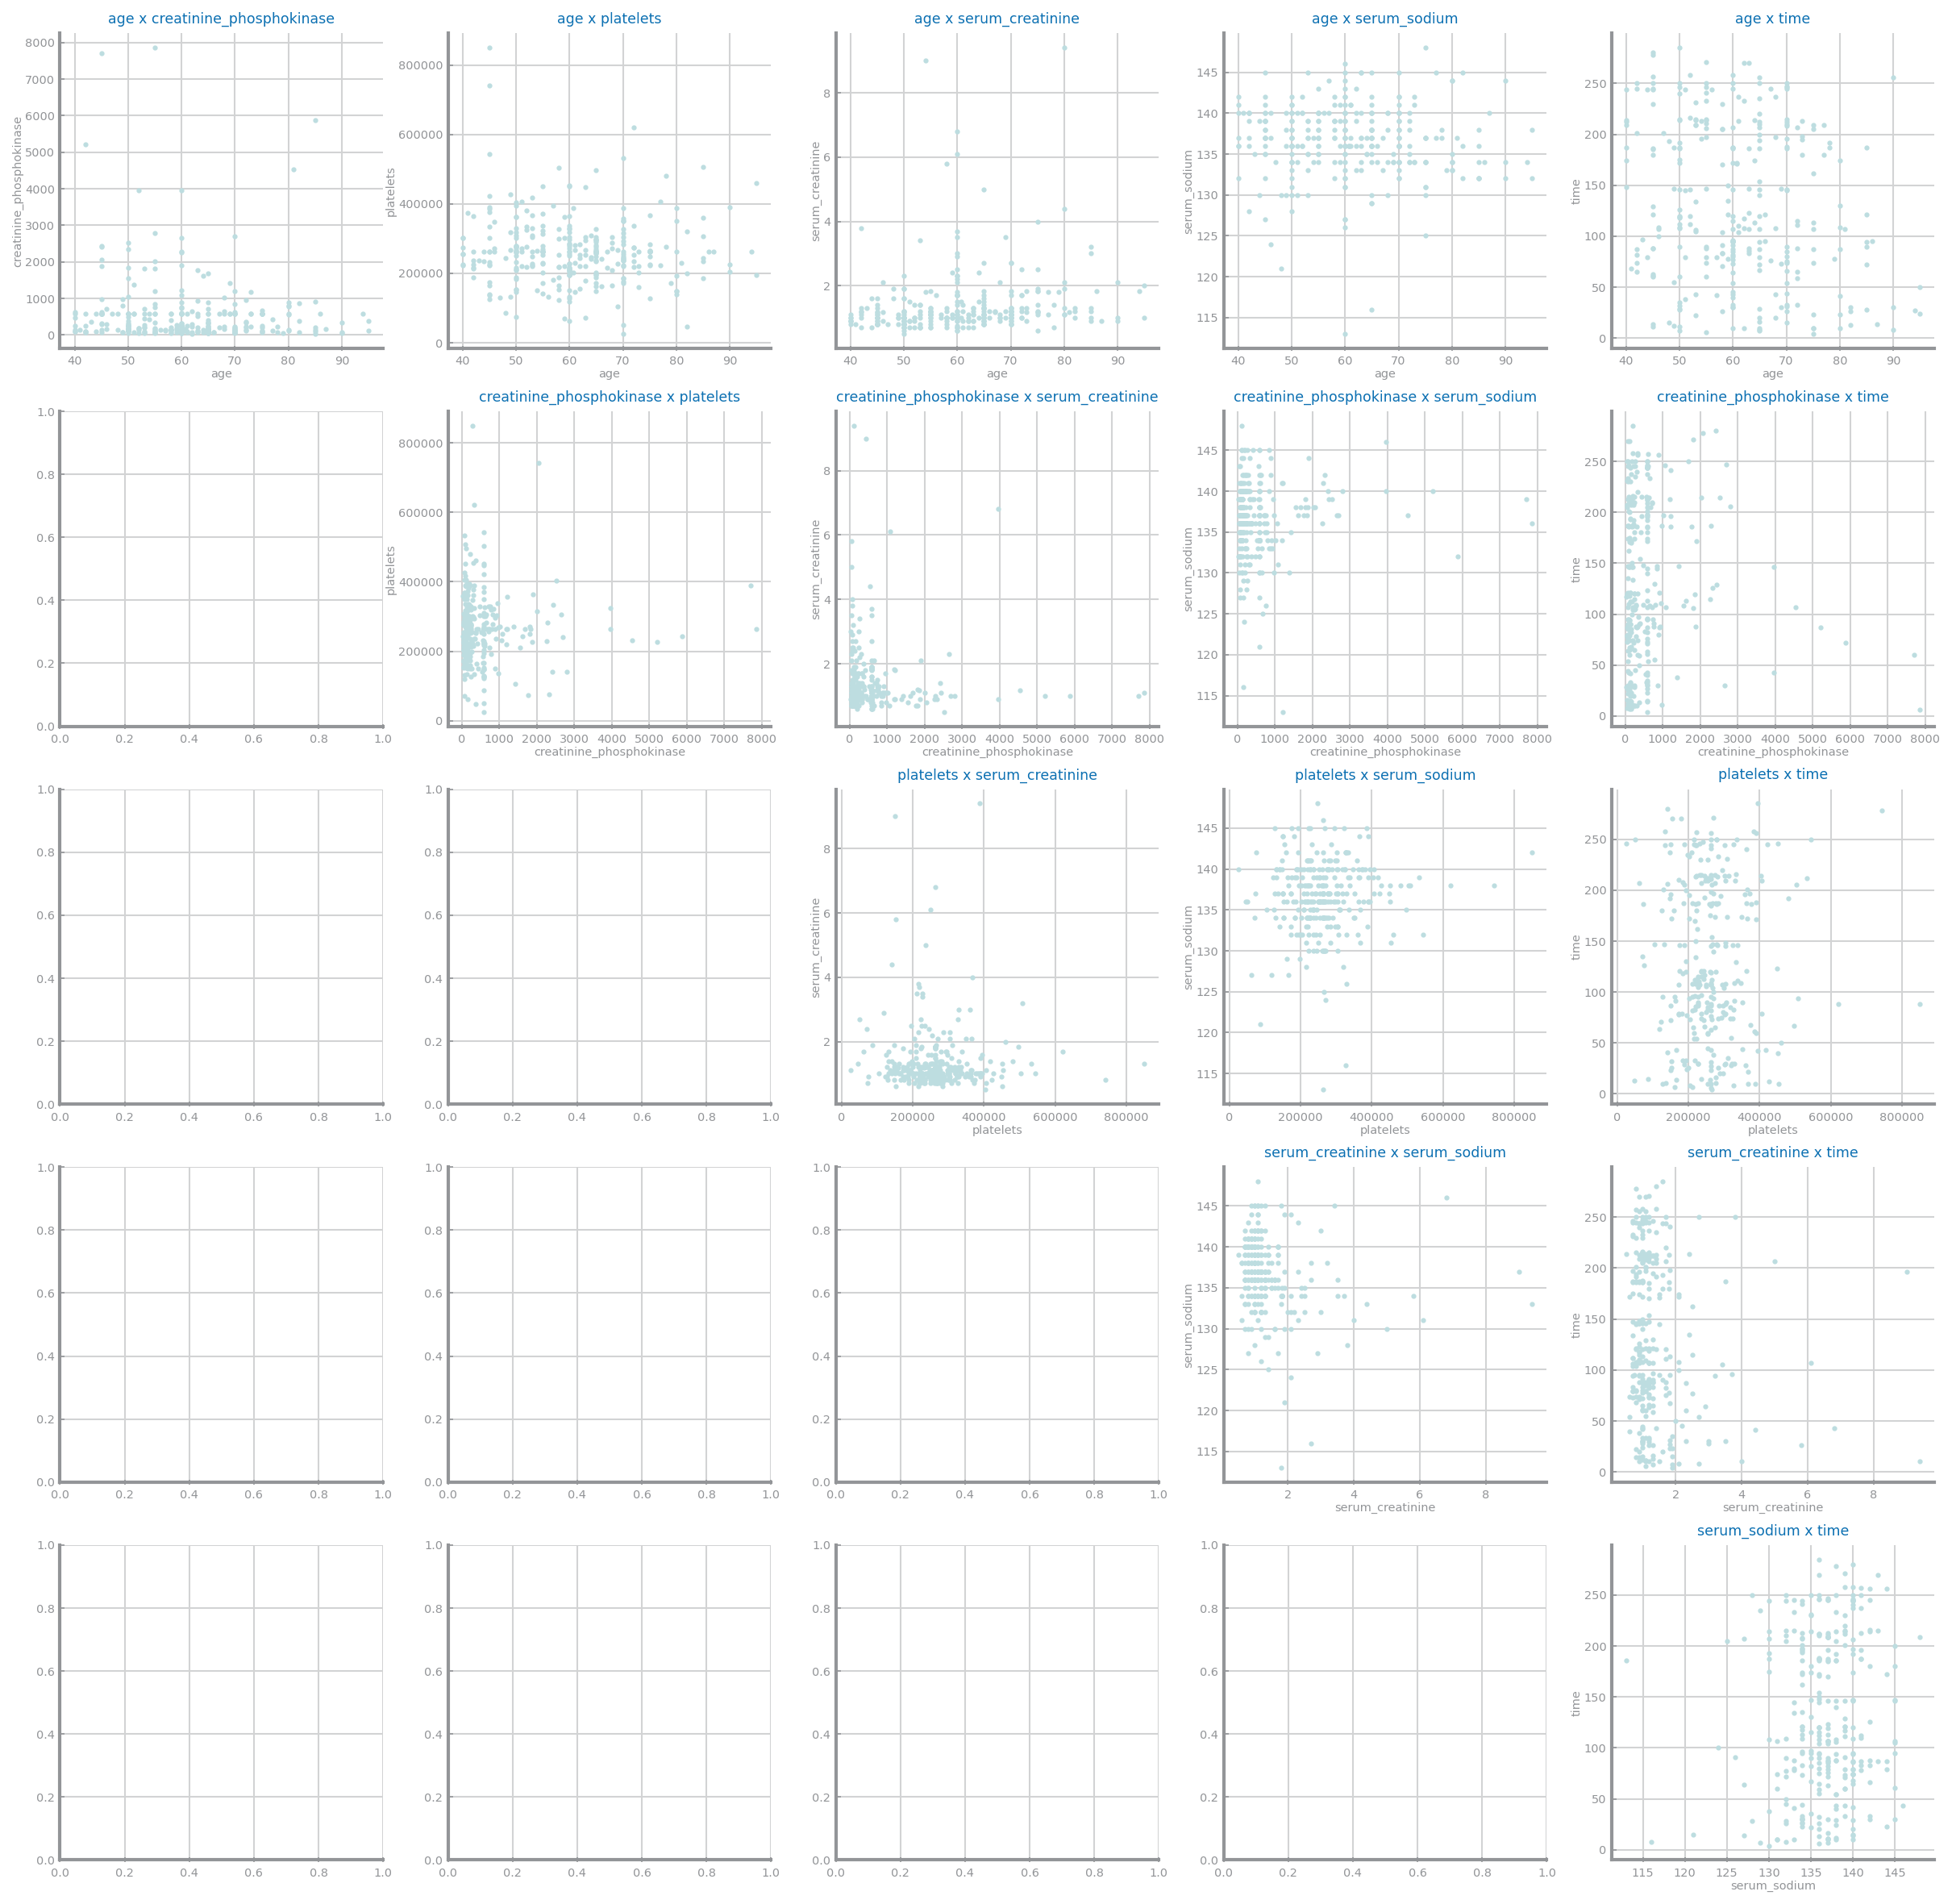

In [6]:
columns = data_no_bool.select_dtypes(include='number').columns
rows, cols = len(columns)-1, len(columns)-1
plt.figure()
fig, axs = plt.subplots(rows, cols, figsize=(cols*4, rows*4), squeeze=False)
for i in range(len(columns)):
    var1 = columns[i]
            
    for j in range(i+1, len(columns)): 
        var2 = columns[j]
        axs[i, j-1].set_title("%s x %s"%(var1,var2))
        axs[i, j-1].set_xlabel(var1)
        axs[i, j-1].set_ylabel(var2)
        axs[i, j-1].scatter(data[var1], data[var2])
plt.show()

Although also useful to analyze the correlation amongst our data's variables, the scatter plots can get tough to analyze when we have a lot of variables (high dimensionality).
As such, we can instead utilize a HeatMap in order to more easily analyze the sparsity of our data.

### Correlation Analysis

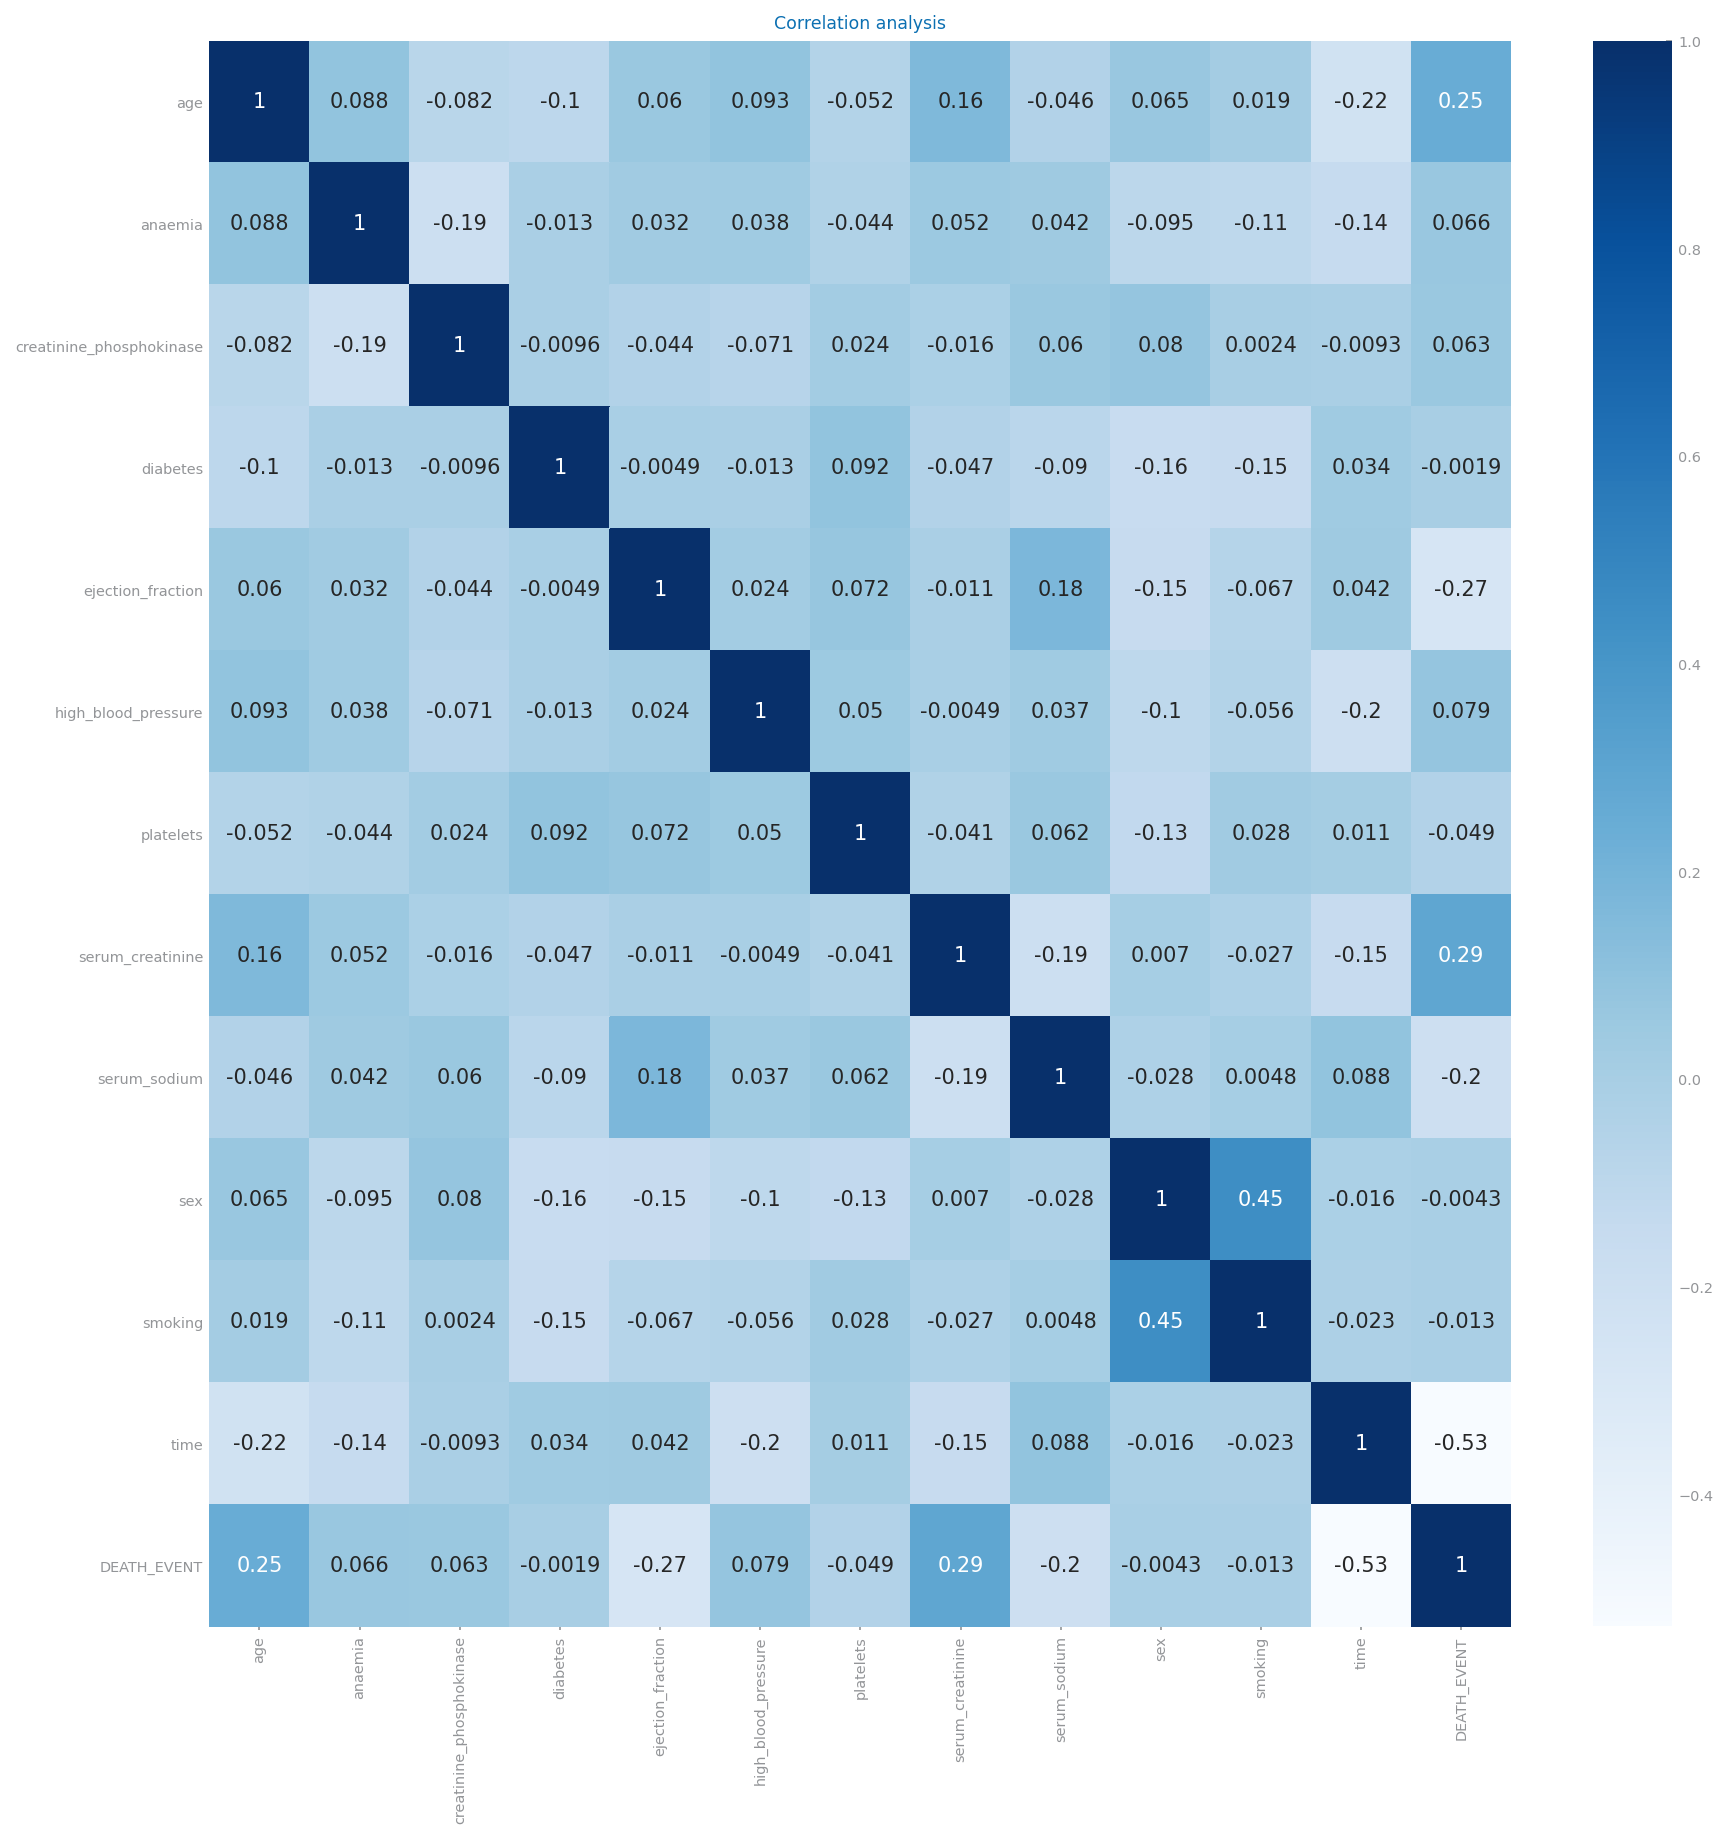

In [7]:
fig = plt.figure(figsize=[14,14])
corr_mtx = data.corr()
sns.heatmap(corr_mtx, xticklabels=corr_mtx.columns, yticklabels=corr_mtx.columns, annot=True, cmap='Blues')
plt.title('Correlation analysis')
plt.show()

This matrix shows us the **sample correlation coefficient** between every two variables. This value ranges between -1 and +1 and quantifies the direction and strength of the linear association between the given two variables. The correlation between two variables can be positive (i.e., higher levels of one variable are associated with higher levels of the other) or negative (i.e., higher levels of one variable are associated with lower levels of the other).

### Summary

**Is the dataset enough to cover the entire domain?**:
- Taking into account we don't have any cells in our matrix that are equal to 0 we can say with some certainty that our dataset is sufficient to cover our domain. Since all cells have values different than 0 this means that our dataset is 100% dense, hence 0% sparse. What this indicates is that we have records that sufficiently represent all possible correlations every given variable pair.

**Are there clusters of records?**:
- Generally speaking, records are well divided across the domain. However, in certain cases like platelets x serum_creatinine we can see a clear cluster of records around the same values.

**Is it possible to identify any anomalies?**:
- Anomalies are easily identifiable by looking at the scatter plots. Although hard due to the dimensionality, there do not seem to be any meaningful anomalies. (???)

**Are there dependent variables?**:
- Values close to 1 indicate that the variables are positively linearly dependant, whilst values close to -1 are negatively correlated to each other. Looking at the matrix we can see some variables, such as _smoking & sex_ which seem to be correlated positively. Negatively we also have some variables that present some dependence but not as high as this one.

NOTA - CONFIRMAR COM A STORA ALL OF THE SUMMARY

## REDUCED QSAR Oral Toxicity Dataset
_Data set containing values for 16 binary attributes (molecular fingerprints) used to classify 8992 chemicals into 2 classes (very toxic/positive, not very toxic/negative)_
	
### Imports

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import config as cfg
import numpy as np

import seaborn as sns

register_matplotlib_converters()

### Generating the dataset

In [9]:
def bin_to_integer(bitlist):
    """Returns the integer conversion from a number represented in a binary string"""
    out = 0
    for bit in bitlist:
        out = (out << 1) | int(bit)

    return out

In [10]:
import csv

with open('../datasets/qsar_oral_toxicity.csv', newline='') as original_data:
    with open('../datasets/oral_reduced/ORAL_reduced64.csv', 'w', newline='') as reduced_data:
        reader = csv.reader(original_data, delimiter=';')
        writer = csv.writer(reduced_data, delimiter=';')
        for row in reader:
            new_row = []

            i = 0
            new_var = ""
            for bit in row:
                new_var += bit
                if i == 63:
                    new_row.append(bin_to_integer(new_var))
                    
                    new_var = ""
                    i = 0
                else:
                    i+=1
                    
            new_row.append(1 if row[-1] == 'positive' else 0) #Append the target variable
                    
            writer.writerow(new_row)

### Load Data

In [11]:
data = pd.read_csv('../datasets/oral_reduced/ORAL_reduced64.csv', sep=';', header=None)

In [12]:
data.head()

0                1                    2   \
0     9147936751484928  598168685248512                14400   
1  2314990945956790272  562984313159680                10312   
2     9147936744144896  562984313159680              2107456   
3    81205530781024256  562992903094272  1152921504606857280   
4     1266637403586576  562984447377408          68719477760   

                    3                   4                    5   \
0  2305843018877370368    4503601774854144  2305845208236949504   
1     4503608217305088          2147483650  2305845208236949504   
2           8589934592          2147484736  2308097008050634752   
3           8589934656          2147483648  6917531226664337408   
4     5638304217169984  576460754455101448        2293529313280   

                   6                  7                 8                9   \
0  288234782788174848   9095435063132160            262208  563087394472960   
1  288234782788174848     88235841945600  2251868533424192  844570961118208   
2  864695536165340160     88235808391168            262208  563087394472448   
3  289360682695017472     88235808391168            262208  563087394996224   
4          8598324224  36046664116469762  2251868533161984          2097168   

                    10                 11              12                13  \
0  9367628237297156096   9007199523177216  43980465111040          16777216   
1  9367627962419249152   9007199254741760  43980465111040  9007199271534592   
2  9367627962553466912   9007199254741760   8796093022208          16777256   
3  9367628001073954818   9218305487274752   8796093022208          20972544   
4  9367487224931942400  72057599406637824     42949939200          16793600   

                   14                    15  16  
0   18014399591612416   9232520265655648256   0  
1  171136786922209280  10385441753351127040   0  
2  162129862545375232   9237023848908456000   0  
3  162129587801686016   9232520248744247296   0  
4  162129586618892320   9232520248811388928   0

### Sparsity
_"A dataset is said to be sparse when most of the space defined by its variables is not covered by the records in the dataset"_

A sparse matrix is a matrix in which most of the elements are zero. On the contrary, a table in which the majority of elements are non zero is called dense. We define the sparsity of a matrix as the number of zero elements divided by the total number of elements. A matrix with sparsity greater than 0.5 is a sparse matrix.

In [13]:
columns = data.select_dtypes(include='number').columns
rows, cols = len(columns)-1, len(columns)-1
plt.figure()
fig, axs = plt.subplots(rows, cols, figsize=(cols*4, rows*4), squeeze=False)
for i in range(len(columns)):
    var1 = columns[i]
            
    for j in range(i+1, len(columns)): 
        var2 = columns[j]
        axs[i, j-1].set_title("%s x %s"%(var1,var2))
        axs[i, j-1].set_xlabel(var1)
        axs[i, j-1].set_ylabel(var2)
        axs[i, j-1].scatter(data[var1], data[var2])
plt.show()

<Figure size 600x450 with 0 Axes>

Although also useful to analyze the correlation amongst our data's variables, the scatter plots can get tough to analyze when we have a lot of variables (high dimensionality).
As such, we can instead utilize a HeatMap in order to more easily analyze the sparsity of our data.

### Correlation Analysis

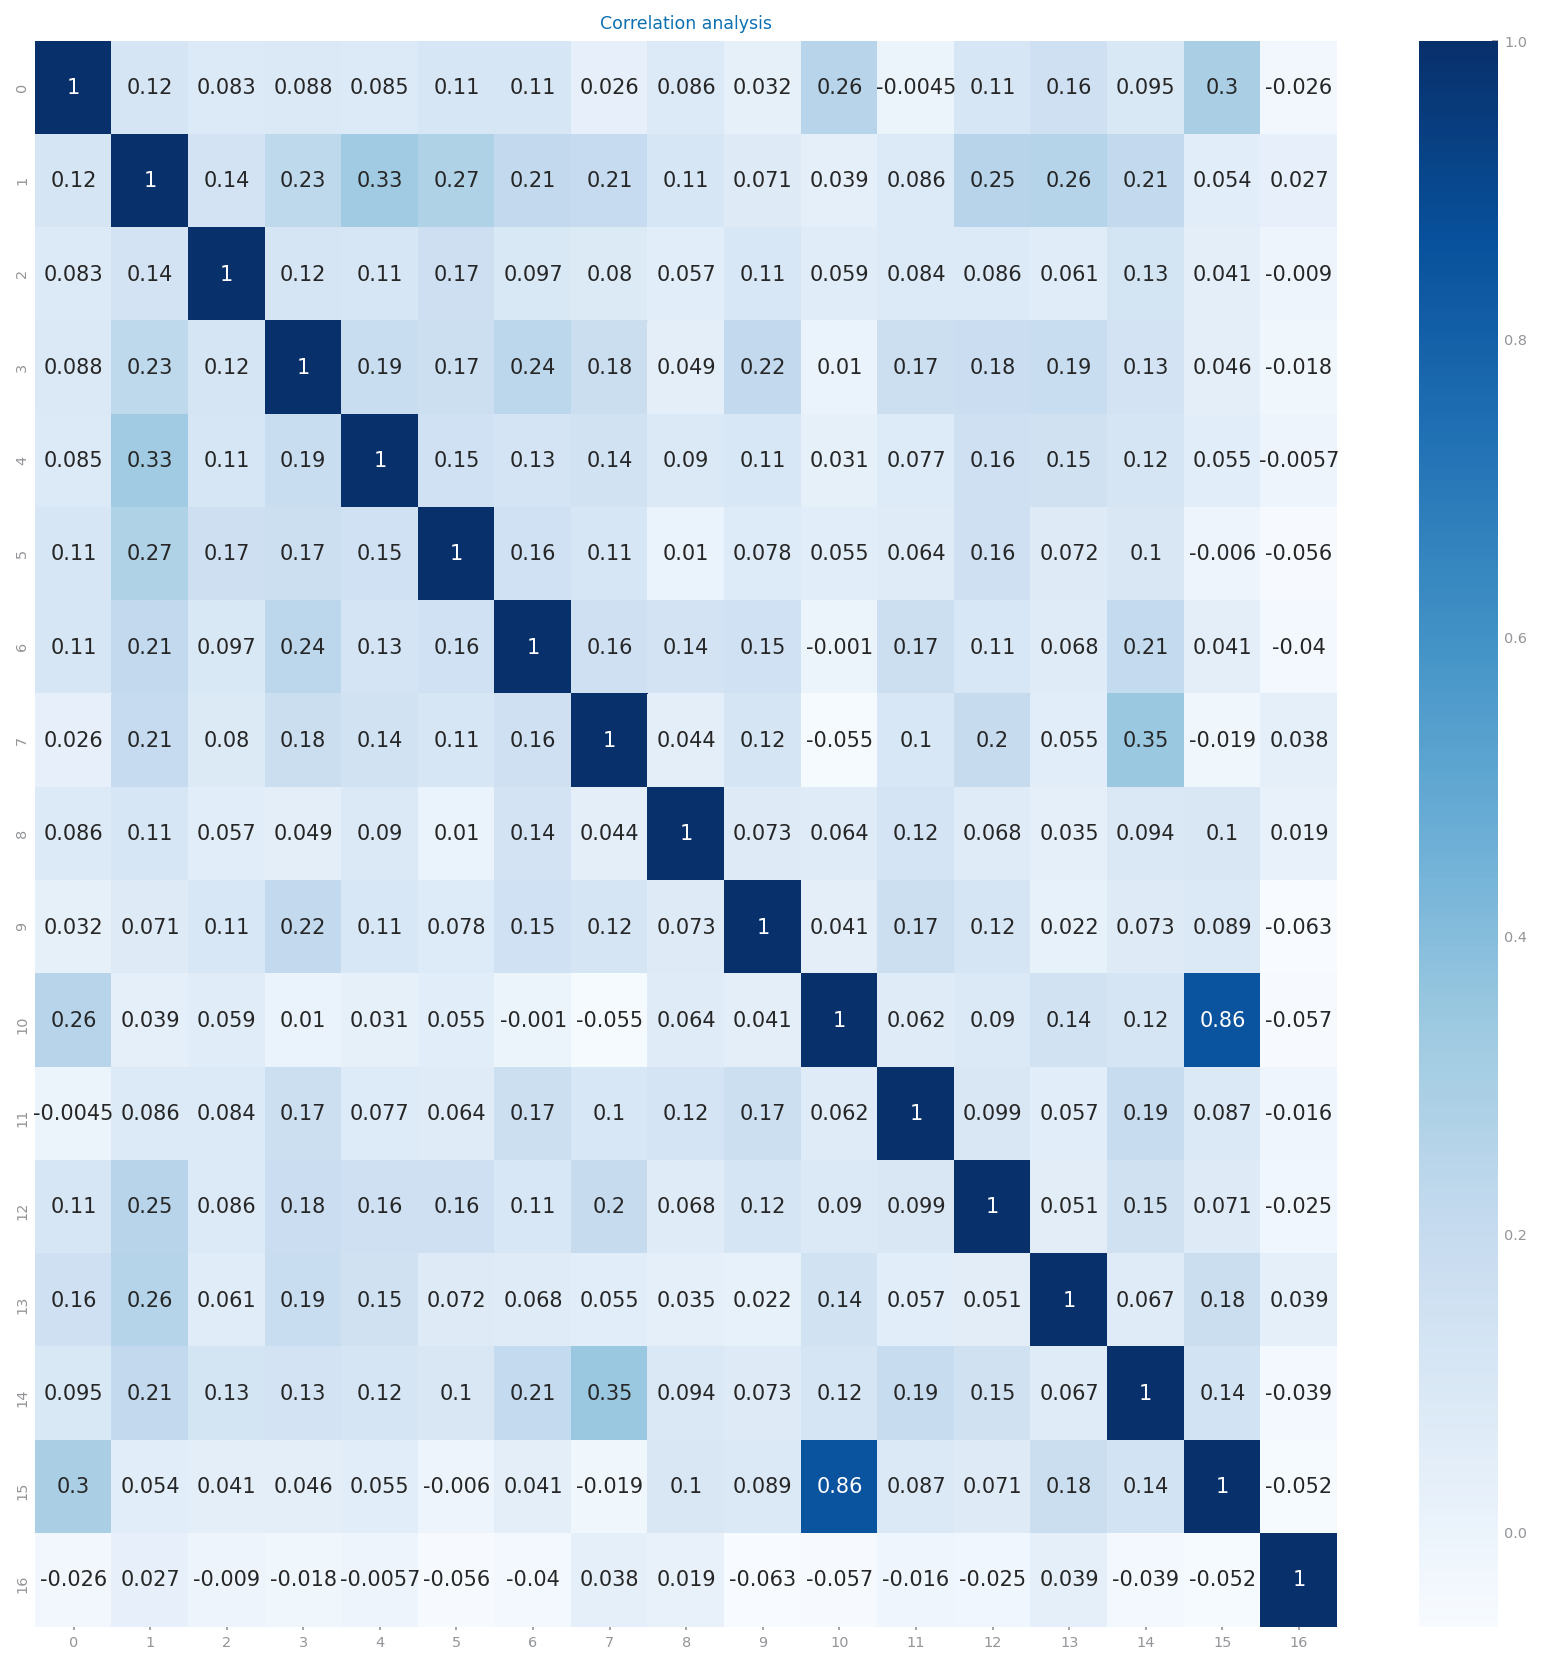

In [14]:
fig = plt.figure(figsize=[14,14])
corr_mtx = data.corr()

sns.heatmap(corr_mtx, xticklabels=corr_mtx.columns, yticklabels=corr_mtx.columns, annot=True, cmap='Blues')
plt.title('Correlation analysis')
plt.show()

### Summary

**Is the dataset enough to cover the entire domain?**:
- From the generated heatmap, we can see most of the entries are very close to zero. In other words, most variables are not correlated, meaning most of the domain is never used.

**Are there clusters of records?**:
- The generated scatterplots show clusters grouped by line, meaning that there are many of the the same combinations. (??)

**Is it possible to identify any anomalies?**:
- Seems like there are not many anomalies.

**Are there dependent variables?**:
- The groups of variables 10 and 15 seem to be strongly correlated. It is probably be relevant to dig further in these variable groups.

NOTA - CONFIRMAR COM A STORA ALL OF THE SUMMARY